Use titanic.csv to build a decision tree.
Target variable: Survived - 1: survived, 0:not survived

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Load the Titanic dataset 
df=pd.read_csv("11 titanic.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [5]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [6]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [7]:
# Drop rows with missing values for all columns
df = df.dropna()

**Dictionaries in Python**

Dictionaries are defined with {}, and contain key-value pairs.   

Here are some helpful videos:
https://www.youtube.com/watch?v=6x8oN6FtpLo&t=4s
https://www.youtube.com/watch?v=MZZSMaEAC2g

In [8]:
customer1 = { "name": "Leah",  
               "age": 30 }

print(customer1)
print(customer1["name"])

{'name': 'Leah', 'age': 30}
Leah


In [12]:
Customers = [ { "name": "Leah","age": 30},
              { "name": "John","age": 45, "gender":"M"},
              { "name": "Paul","age": 23}]

Customers[1]["name"]

'John'

scikit-learn needs everything to be numerical for decision trees to work.   
So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2.     
By using map(), we know we'll get NaN for unexpected values.  

In [13]:
d = {'female': 1, 
     'male': 0}
df['Sex'] = df['Sex'].map(d)


d2 = {'S': 0, 
     'C': 1, 
     'Q': 2}
df['Embarked'] = df['Embarked'].map(d2)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [14]:
# Define target variable (y) and features (X)
X = df.iloc[:,1:9]
y = df.iloc[:, 0]

In [15]:
# Split data into training (80%) and testing (20%) sets, using seed 80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

# Create and train the decision tree model
model = DecisionTreeClassifier(random_state=80,criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=80)

In [16]:
print(model.classes_) #checking the order of the classes for the plotting step

[0 1]


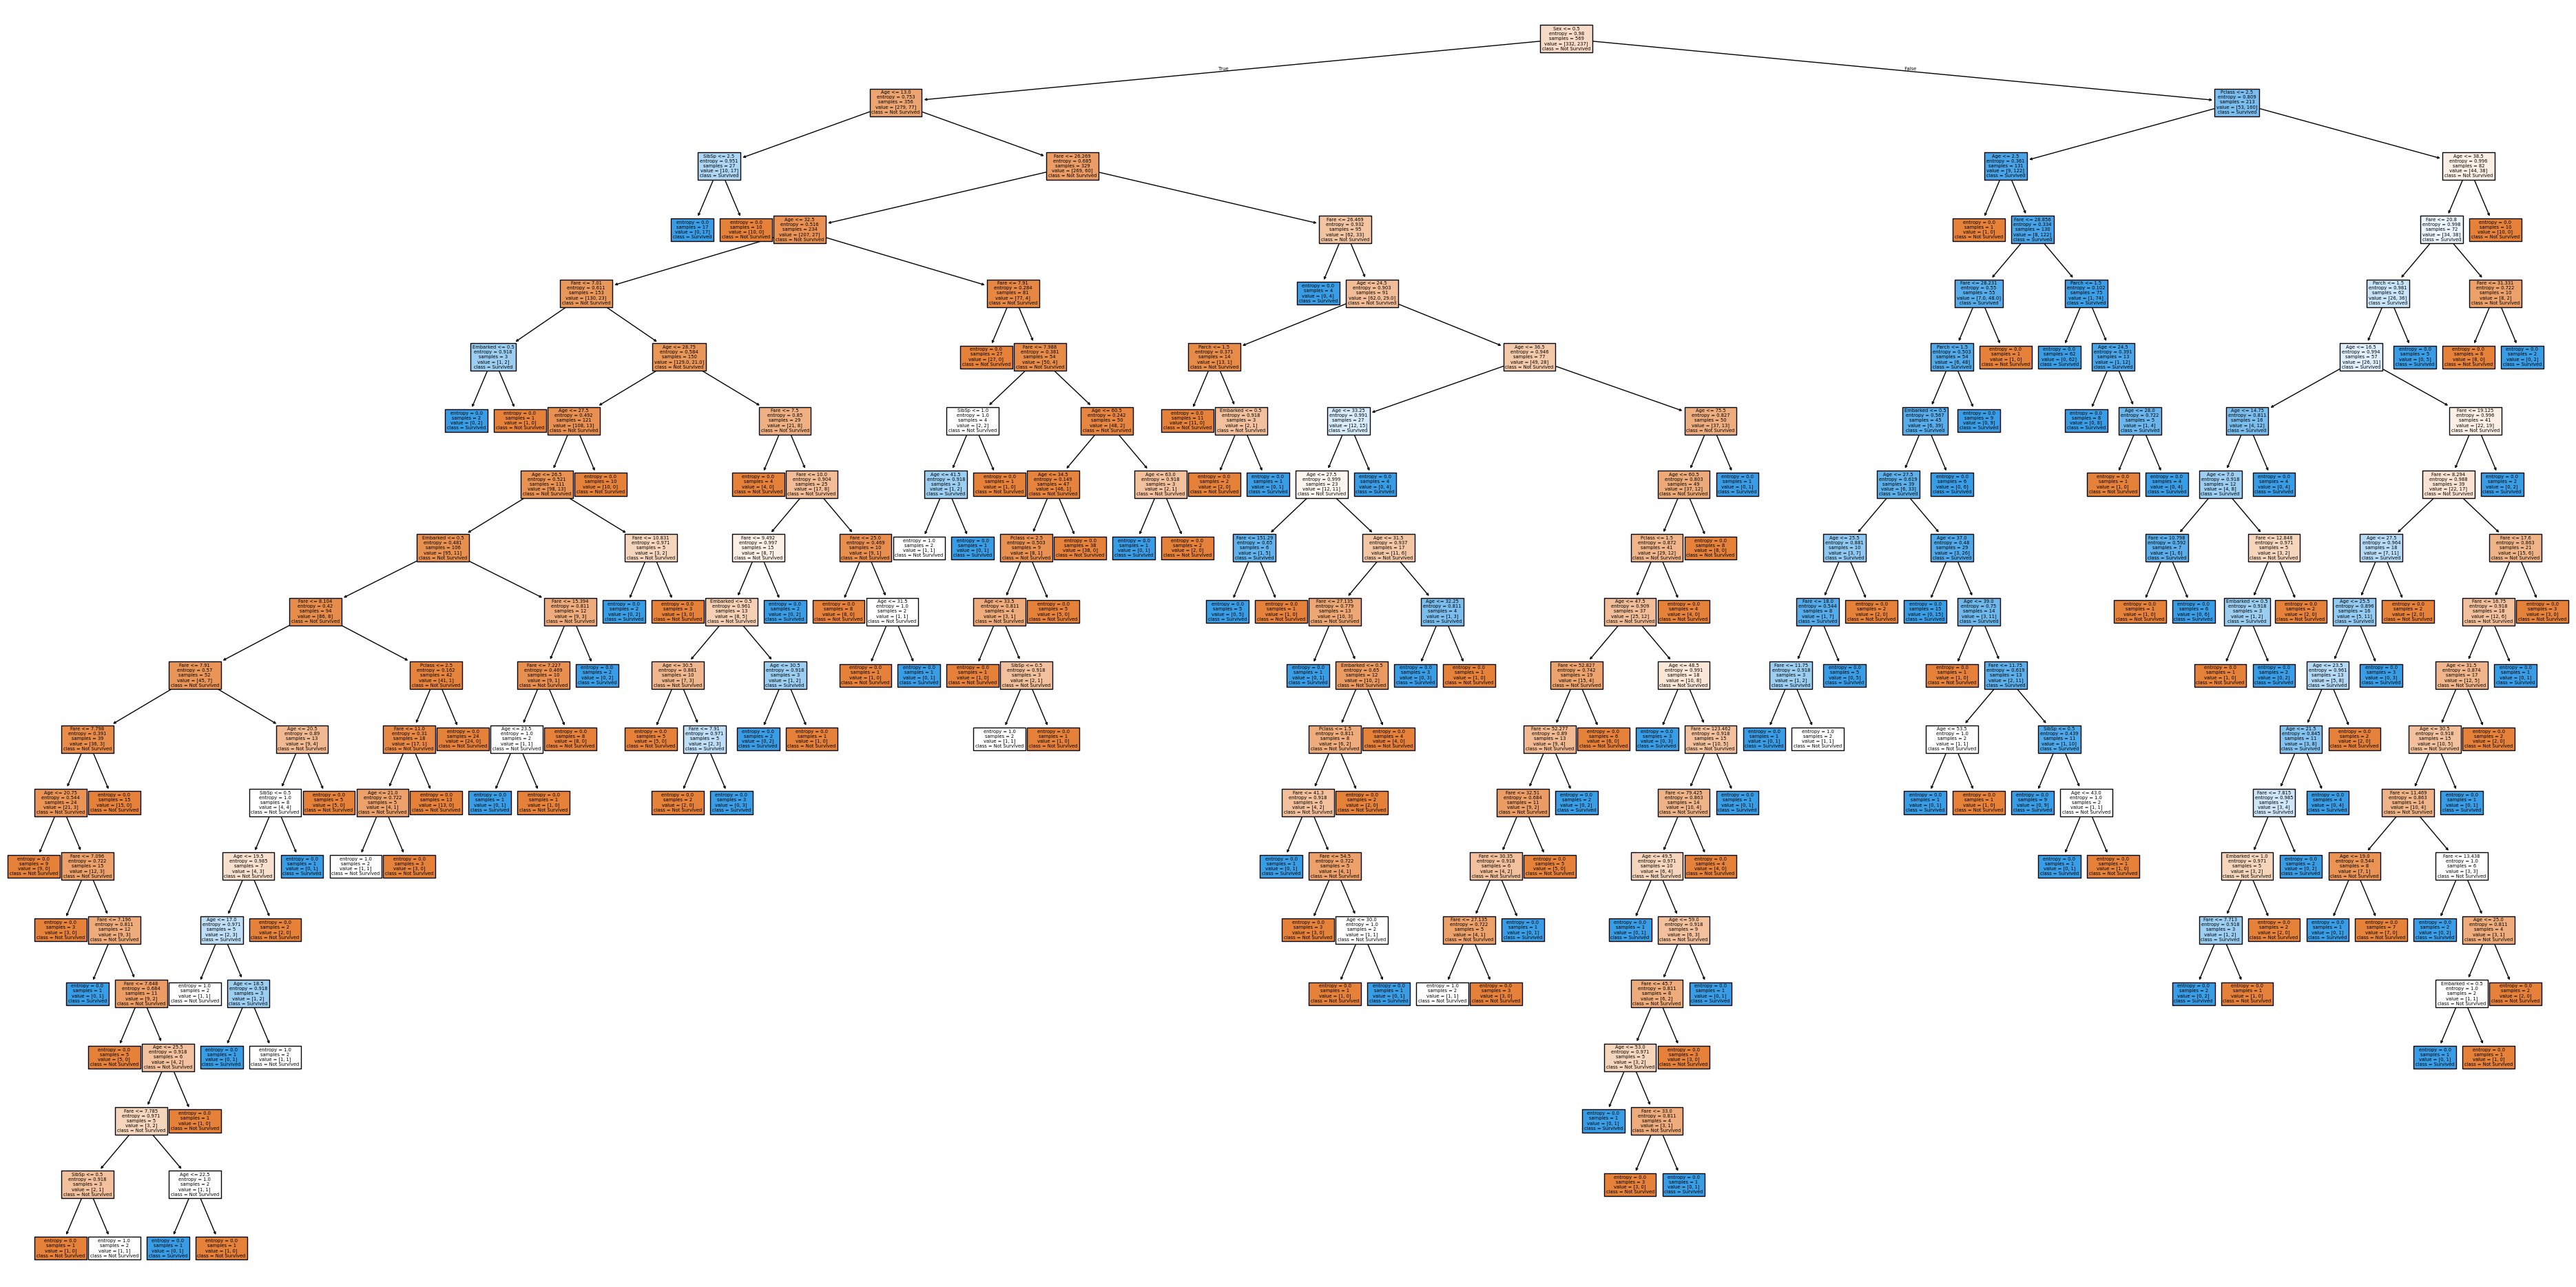

In [17]:
# Show decision tree plot
plt.figure(figsize=(48,24))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

**Decision Tree Pruning**

In [18]:
## Set constraints when creating the tree
pruned_tree = DecisionTreeClassifier(
    random_state=80,
    criterion='entropy',
    #max_depth=5,                  # Limit the depth of the tree
    min_samples_split=5,           # Min samples required to split a node
    #min_samples_leaf=5,           # Min samples required in a leaf node
    #max_leaf_nodes=20,            # Max number of leaf nodes
    min_impurity_decrease=0.01     # Min impurity decrease required for splitting
)

pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01,
                       min_samples_split=5, random_state=80)

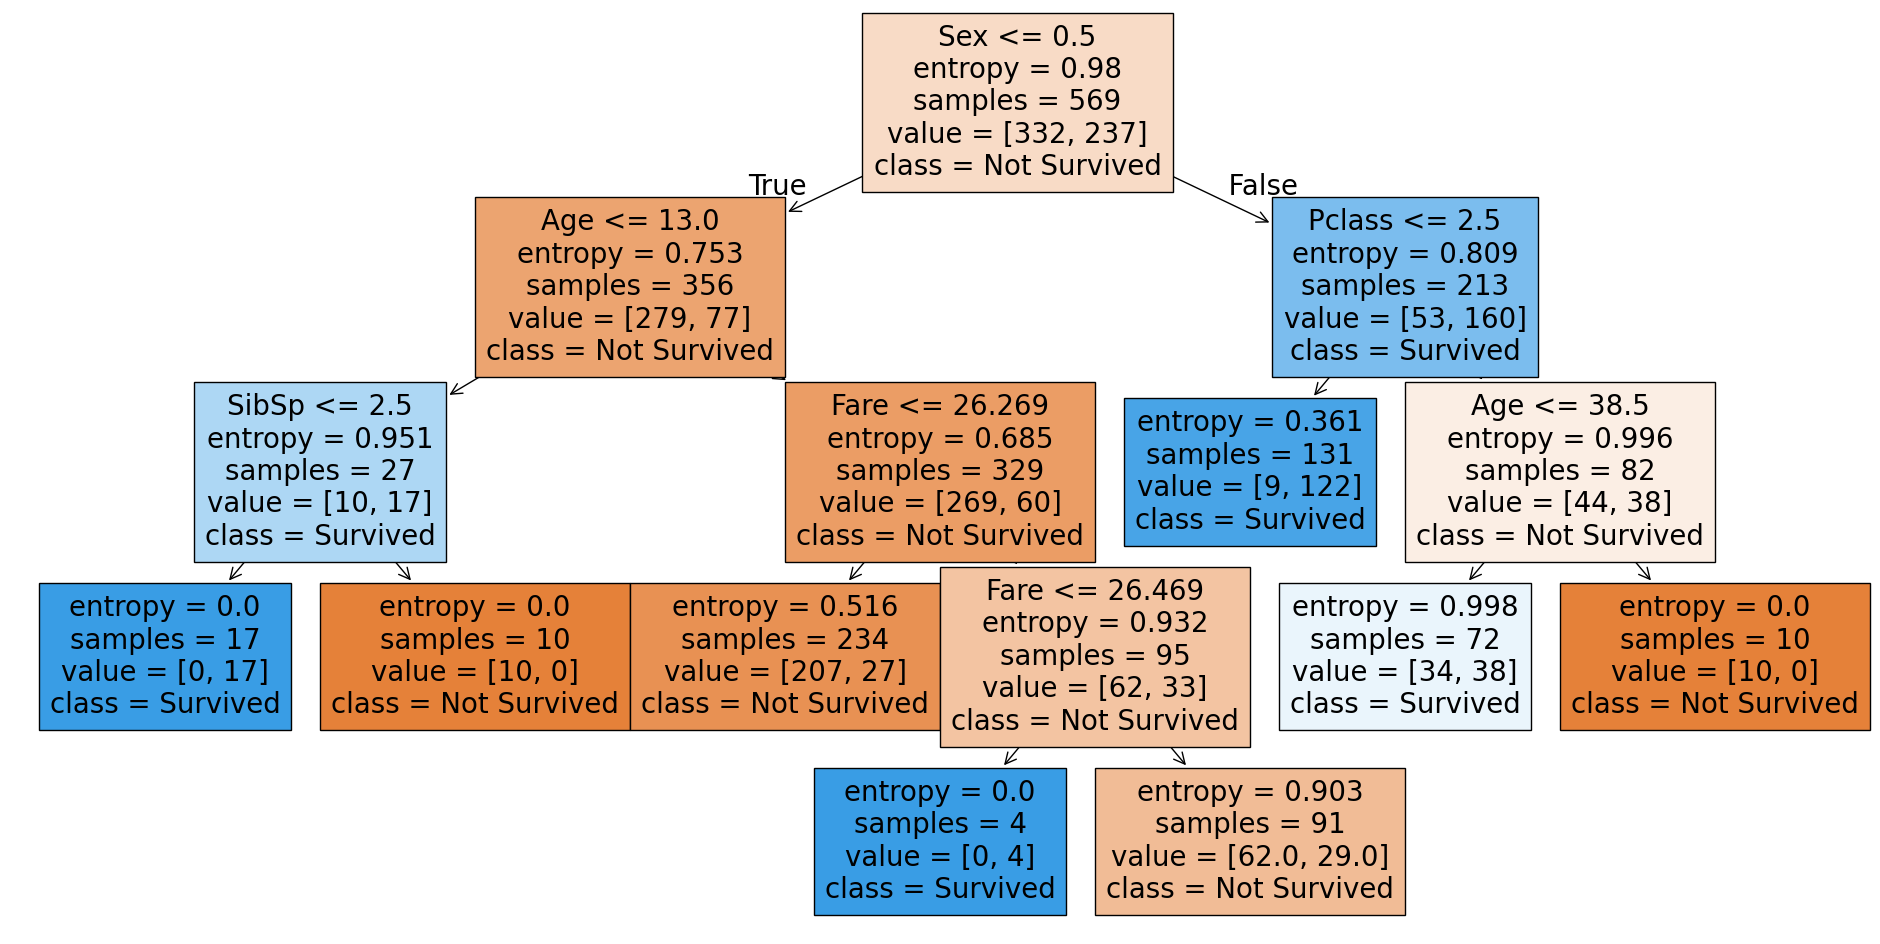

In [19]:
plt.figure(figsize=(24,12))
plot_tree(pruned_tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Each box (node) in the tree represents a decision point (split) based on a feature. The tree follows a hierarchical structure:  
  
Root Node (Top): The first decision (split) based on the most important feature.  
Intermediate Nodes (Middle): Additional decision splits.  
Leaf Nodes (Bottom): The final classification decision (either "Hired" or "Not Hired").  
  
Each node contains:  
  
Feature used for splitting (e.g., Interned <= 0.5).  
Entropy (entropy): A measure of impurity based on information gain from information theory.   
Number of samples (samples): The number of data points at that node.  
Value (value): The count of samples in each class (e.g., [4, 9] means 4 "Not Hired" and 9 "Hired").  
Class (class): The majority class (either "Hired" or "Not Hired").    

The shades of the notes represent entropy levels. 

In [ ]:
# Predictions on the test set
y_pred_1 = model.predict(X_test)

# Compute accuracy, sensitivity, and specificity
accuracy_score(y_test, y_pred_1)

In [ ]:
# Predictions on the test set
y_pred_2 = pruned_tree.predict(X_test)

# Compute accuracy, sensitivity, and specificity
accuracy_score(y_test, y_pred_2)

In [ ]:
pd.crosstab(y_test, y_pred_1) # rows are actual, columns are predicted

In [ ]:
pd.crosstab(y_test, y_pred_2) # rows are actual, columns are predicted